# Imports

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Config

In [166]:
DATA_DIR = "./data"

In [167]:
def get_data_path(filename):
    return os.path.join(DATA_DIR, filename)

In [168]:
sns.set_theme()
sns.set_style("ticks")
sns.despine()

%matplotlib inline

# Loading Dataset

In [169]:
filepath = get_data_path("train.csv")
df = pd.read_csv(filepath)

In [170]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Summary

Below, the data has been summarised. The only thing of value that we can conclude from this summary is that most of the features have missing values. `PassengerId` is the only feature with no missing values. All the other features have missing values, which may or may not need to be handled. Moreover, the `Name` feature may not be that useful.

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Basic Feature Engineering

There are some features that can be engineered without much exploration. Their usability in a model can then be judged.

## Using `PassengerId`

`PassengerId` is formatted as `gggg_pp`, where `gggg` is the ID of the group the passenger was traveling with and `pp` is their number in the group.

> Note: Here, number in the group is not the group size but the position of the passenger in the group.

There are two features that can be extracted from this:
- `GroupId`, which gives us a feature which represents the group a passenger belongs to.
- `GroupSize`, which gives us a feature which indicates the size of the group.

In [172]:
df["PassengerId"].head()

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

In [173]:
# expand=True returns a DataFrame with numerical columns 0, 1, ...
split_id = df["PassengerId"].str.split("_", expand=True)
split_id.head()

,0,1
0,0001,01
1,0002,01
2,0003,01
3,0003,02
4,0004,01


In [174]:
df["GroupId"] = split_id[0]
df["GroupSize"] = df.groupby("GroupId")["GroupId"].transform("count")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1


## Using `Cabin`

`Cabin` is formatted as `deck/num/side`, where `deck` is the deck the cabin is on, `num` is the cabin number and `side` is one of `P` or `S`, for port and starboard respectively.

The following features can be extracted from this:

- `CabinDeck`: Deck on which the passenger's cabin is.
- `CabinId`: Combination of the `deck` and `num` components to get a single cabin number, without the side.
- `CabinSide`: Side the cabin is on.

In [175]:
split_cabin = df["Cabin"].str.split("/", expand=True)
split_cabin.head()

,0,1,2
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [176]:
df["CabinDeck"] = split_cabin[0]
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,CabinDeck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F


In [177]:
df["CabinId"] = split_cabin[0] + split_cabin[1]
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,CabinDeck,CabinId
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,B0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,F0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,A0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,A0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F,F1


In [178]:
df["CabinSide"] = split_cabin[2]
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,CabinDeck,CabinId,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,B0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,F0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,A0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,A0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F,F1,S


## Using Expenditure Columns

The expenditure columns can be summed up together to get a total expenditure of the passenger while on board.

In [179]:
expenditure_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df["TotalExpense"] = df[expenditure_cols].sum(axis=1)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,B0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,F0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,A0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,A0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F,F1,S,1091.0


# Types of Features

In this section, we figure out which features are categorical/ordinal and which are numerical. This can be achieved by using `value_counts()` on the columns.

## Categorical/Ordinal Features

We can see that the following features are categorical/ordinal:

* `HomePlanet`
* `CryoSleep`
* `Destination`
* `VIP`
* `GroupId`
* `GroupSize`
* `CabinDeck`
* `CabinId`
* `CabinSide`

All these features are not encoded properly and will require an encoder.

In [180]:
df["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [181]:
df["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [182]:
df["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [183]:
df["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [184]:
df["GroupId"].value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: GroupId, Length: 6217, dtype: int64

In [185]:
df["GroupSize"].value_counts()

1    4805
2    1682
3    1020
4     412
5     265
7     231
6     174
8     104
Name: GroupSize, dtype: int64

In [186]:
df["CabinDeck"].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

In [187]:
df["CabinId"].value_counts()

G1476    11
C137     10
G734      9
F1411     9
C225      9
         ..
E367      1
B198      1
G940      1
G944      1
B0        1
Name: CabinId, Length: 4453, dtype: int64

In [188]:
df["CabinSide"].value_counts()

S    4288
P    4206
Name: CabinSide, dtype: int64

## Numerical Features

All remaining features are numerical.

# Per-feature Insights

## `Age`

### Null values

There are ~2.06% null values in the `Age` feature.

In [189]:
(df["Age"].isna().sum() / len(df)) * 100

2.0591280340503855

An interesting thing to explore is the relationship between these null `Age` values and `VIP` status.

In [190]:
age_df = df[df["Age"].isna() == True]
age_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False,0052,1,G,G6,S,4689.0
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False,0068,1,E,E4,S,1048.0
137,0149_01,Earth,True,G/27/S,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Billya Hubbarrison,True,0149,1,G,G27,S,0.0
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,True,0202,2,A,A2,P,3754.0
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,True,0206,1,C,C9,S,2981.0


Most of these passengers do not are not VIPs.

In [191]:
age_df["VIP"].value_counts()

False    172
True       1
Name: VIP, dtype: int64

It might also be interesting to see their expenditure while they were on board the spaceship. As can be seen, ~75% of these passengers spent less than or equal to $1092.5 while on board.

In [192]:
age_df["TotalExpense"].describe()

count      179.000000
mean      1297.100559
std       2861.793044
min          0.000000
25%          0.000000
50%        595.000000
75%       1092.500000
max      22261.000000
Name: TotalExpense, dtype: float64

It can be seen that most of these passengers didn't spend any money. There are a few outliers where the passengers spent a lot of money.

<AxesSubplot:xlabel='TotalExpense', ylabel='Count'>

<Figure size 432x288 with 1 Axes>

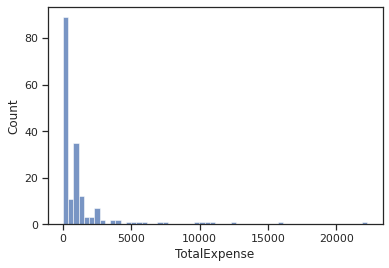

In [193]:
sns.histplot(x=age_df["TotalExpense"])

The passenger Achira Unhaftimle is the only passenger who spent the maximum amount.

In [194]:
age_df[age_df["TotalExpense"] == 22261]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense
5998,6348_01,Europa,False,C/238/S,55 Cancri e,NaN,False,49.0,13342.0,NaN,1885.0,6985.0,Achira Unhaftimle,False,6348,1,C,C238,S,22261.0


An interesting question here is whether this passenger is associated with any VIP passenger. There are three possibilities.

- There is a passenger who is a VIP and has the same surname as this passenger.
- There is a passenger who is a VIP and has a similar ID as this passenger.
- There is no affiliated passenger.

As can be seen below, no one else with this surname was on board and no one with a similar passenger ID was on board. Seems weird that the agency would not record the age of such a high spender, doesn't it?

In [195]:
names = df[["PassengerId", "Name", "VIP"]]
names[names["Name"].str.contains("Unhaftimle") == True]

,PassengerId,Name,VIP
5998,6348_01,Achira Unhaftimle,False


In [196]:
names[names["PassengerId"].str.contains("6348")]

,PassengerId,Name,VIP
5998,6348_01,Achira Unhaftimle,False


Let's also take a look at the sole VIP member among these passengers. Wow, a Martian!

In [197]:
age_df[age_df["VIP"] == True]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,GroupSize,CabinDeck,CabinId,CabinSide,TotalExpense
5198,5544_01,Mars,False,F/1149/P,TRAPPIST-1e,NaN,True,1565.0,0.0,0.0,0.0,145.0,Minnys Stité,False,5544,1,F,F1149,P,1710.0
